### Asssignment

Name: Bakang Monei Motshegwe
Module: CSE301-Intelligent Systems
Email: cse20-018@thuto.bac.ac.bw

### Deliverables 

Task 1: Analyse and visualize data. [15 points]


Task 2: Clean data.	[20 points]


Task 3: Develop machine learning models - logistic regression and  Decision Tree. [20 points]

Task 4: Build a deep learning model on the data. [25 points]


Task 5: Compare the accuracy of all the models by using an appropriate visualization. [20 points]


##Importing Relevant Libraries

In [1]:
#Importing Dependencies
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import seaborn as sns 

In [2]:
df= pd.read_csv('CSEdata.csv')   #reading our CSV file using pandas to convert to dataframe

In [3]:
df.head() #Return the first 5 segments of the dataset

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Data Cleaning and Preparation for Exploration and Modelling

**Techniques which are effeicient for Data Preprocessing and Data Cleaning:**

· Handling Null / Missing Values

· Handling the categorical Values

· Using get_dummies Method (Feature Engineering)

In [4]:
df.isna().sum() #what features (columns) contain null or missing values into the dataset.

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

- No existing null/ missing values in the dataset

- if missing values existed we would have soled this problem using the fillna method to fill up the mean of the missing values 

## Handling the categorical Values

Categorical Data is the data that generally takes a limited number of possible values. If data in the category is not numerical but textual in nature we would need to convert it to numeral reason being that machine learning models are mathematically inclined model and predictions are made based on numbers.

## The steps below are first dropping the columns containing the categorical values 

In [5]:
df.drop('Id',axis= 1, inplace= True)#this function will remove the selected column (i.e ID) from the dataset.
#if we set inplace = True 

In [6]:
df.drop('STATE',axis= 1, inplace= True)

In [7]:
df.drop('CITY',axis= 1, inplace= True)

In [8]:
df.drop('Profession',axis= 1, inplace= True)

In [9]:
df.columns # return all columns in the dataset after dropping columns with categorical values

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

## The step below is for the purposes of handling the categorical values 

- We will do this using the map function map() which is used to substitute each value in a Series with another value, this will change/replace categorical variables with the binary numbers 0 and or 1

- Another alternative is to use the get_dummies function but for the purposes of this project we use the map function

-  The get_dummies creates at least (No_of_values-1) new columns while map can keep all the information in a single one.

In [10]:
#Converting categorical values to numerical values 
df['Married/Single']= df['Married/Single'].map({'married':0, 'single':1})
df['House_Ownership']= df['House_Ownership'].map({'rented':0, 'owned':1, 'norent_noown':2})
df['Car_Ownership']=df['Car_Ownership'].map({'yes':0, 'no':1})


After converting all the categorical values our dataset information look like below:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   Married/Single     252000 non-null  int64
 4   House_Ownership    252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   CURRENT_JOB_YRS    252000 non-null  int64
 7   CURRENT_HOUSE_YRS  252000 non-null  int64
 8   Risk_Flag          252000 non-null  int64
dtypes: int64(9)
memory usage: 17.3 MB


**Note that the one Categorical value (Risk_Flag) is our dependent feature so there is no need for converting into numerical value.**

- Here there are no missing or null values. Our dataset is ready for model building

#Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visualizations. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## First we showcase the correlation between the data features using a heatmap

- visualize and inspect for correlation among variables, and select features

- the labels on the side show which features are correlated that is from 0.6 to 1.0 it show a high correlation between features

<function matplotlib.pyplot.show(close=None, block=None)>

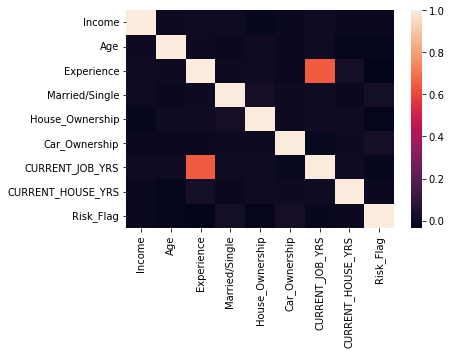

In [12]:
sns.heatmap(df.corr())
plt.show

##We maybe curious to decipher how the target variable distributed overally in the dataset...


Our **Target variable** in the dataframe is the element **Risk_Flag.**

 The data type is a binary which has either 1 or 0 value. 1 indicates customer who are defaulted in loan repaymemt and 0 indicates who are not. so, to see how target variables are distributed we can use value_counts function as below.

0    221004
1     30996
Name: Risk_Flag, dtype: int64


Text(0.5, 1.0, 'Default Count')

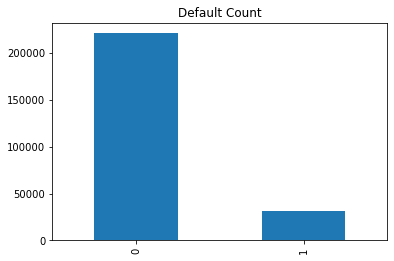

In [13]:
print(df.Risk_Flag.value_counts())
df.Risk_Flag.value_counts().plot.bar()
plt.title('Default Count')

### We will now explore the distinct relationship between the target variable i.e dependent variable and other categorical variables :

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

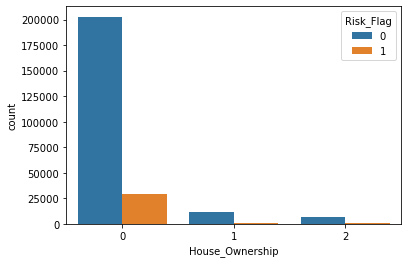

In [14]:
#Effect of House ownership on Risk Flag
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)

### Let’s understand loan allocation/ Risk_Flag based on Marital status features in the dataset

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

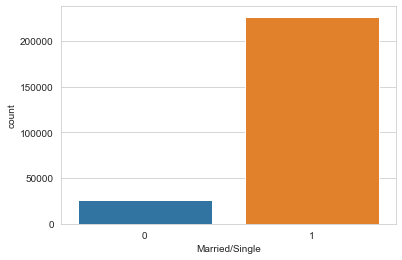

In [15]:
sns.set_style('whitegrid')
sns.countplot( x= 'Married/Single' , data = df) #{'married':0, 'single':1})

Text(0.5, 1.0, 'Marital Bar Graph')

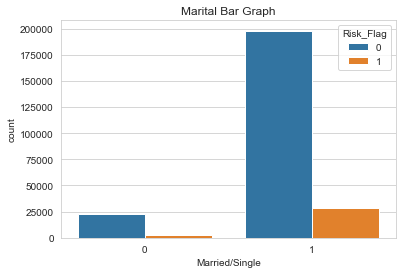

In [16]:
# Let's Bar Chart to draw the marital vs loan default chart
sns.countplot(x='Married/Single',hue='Risk_Flag',data=df)
plt.title('Marital Bar Graph')

### Let's understand the Risk_Flag status based on income , how much an individual earns presumably monthly

<AxesSubplot:>

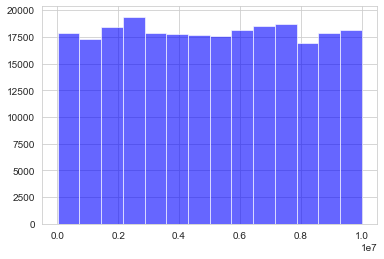

In [17]:
df['Income'].hist(bins= 14, color = 'blue', alpha =0.6)

<AxesSubplot:ylabel='Age'>

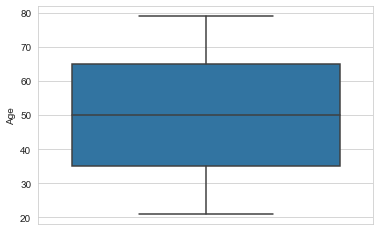

In [18]:
sns.boxplot(y = 'Age', data = df)
# overal age distribution of the Risk_Flag participants under observation

Now, lets draw the relation between between age and loan default variable.

Text(0.5, 1.0, 'Age BoxPlot')

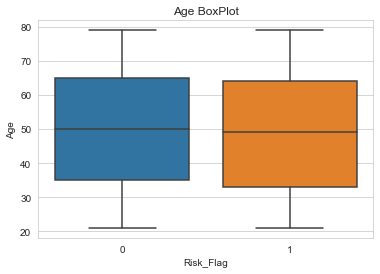

In [19]:
sns.boxplot(x='Risk_Flag', y='Age',data=df)
plt.title('Age BoxPlot')

In [20]:
# lets understand risk_flag in comparison to house ownership
house_loan=pd.crosstab(df['House_Ownership'],df['Risk_Flag'])
house_loan

Risk_Flag,0,1
House_Ownership,,
0,202777,29121
1,11758,1160
2,6469,715


Let's understand the distribution of the target variable according to length of experience , urrent job years , they state particiant under observation lives in and if they own a vehicle, to decipher how  they each influence the rate of defaulting or not defaulting i.e the Risk_Flag

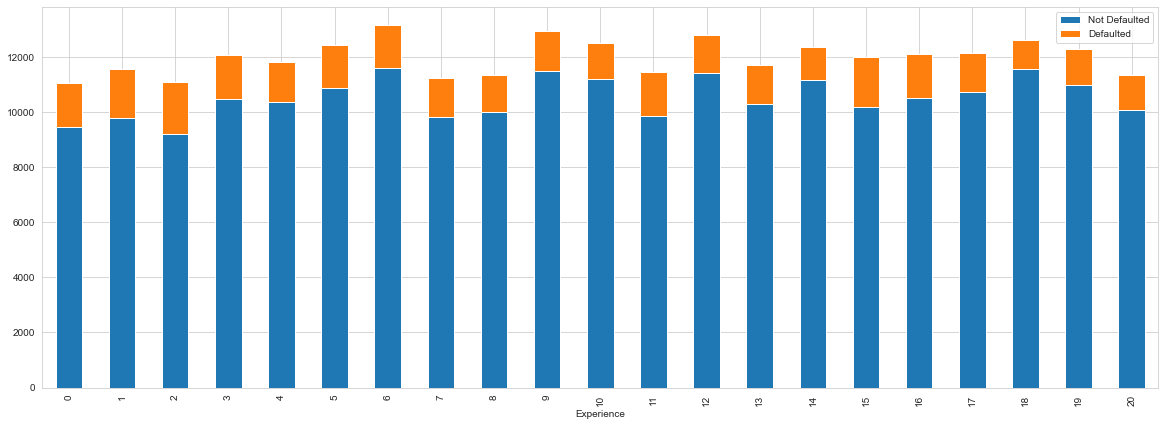

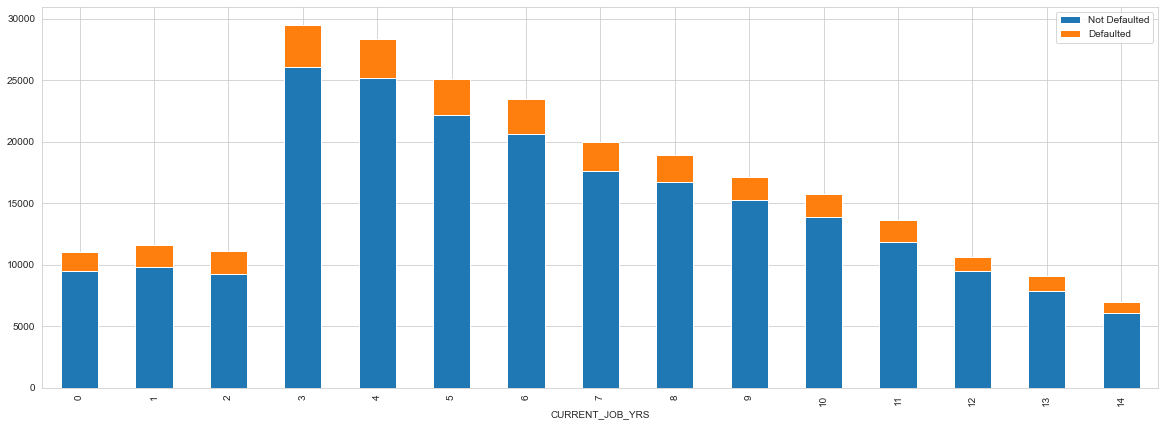

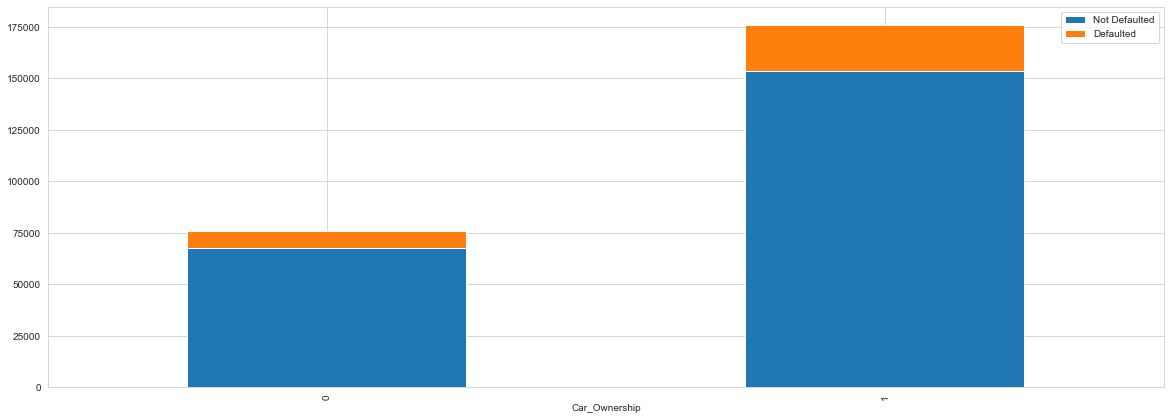

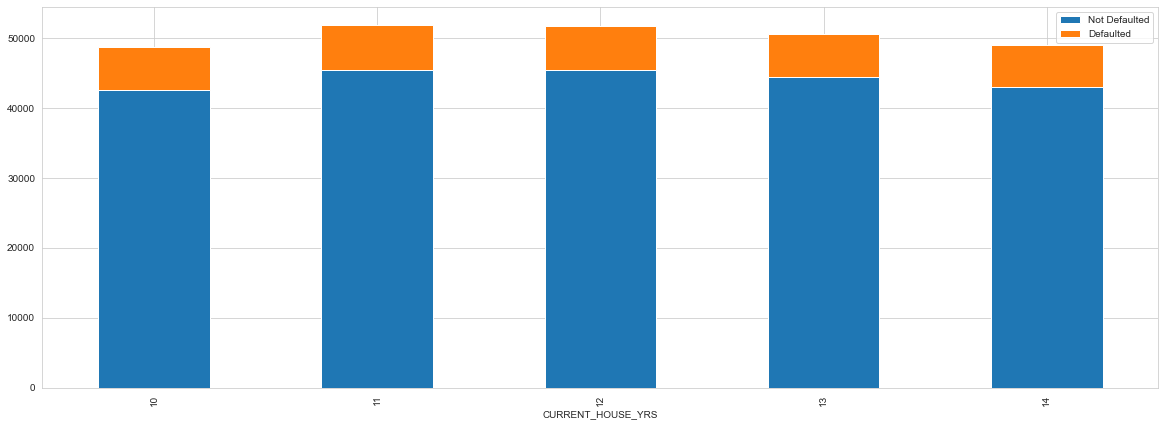

In [21]:
for i in ['Experience','CURRENT_JOB_YRS','Car_Ownership','CURRENT_HOUSE_YRS']:
    ct = pd.crosstab(df[i], df['Risk_Flag'])
    ct.plot.bar(stacked = True,figsize=(20,7))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()

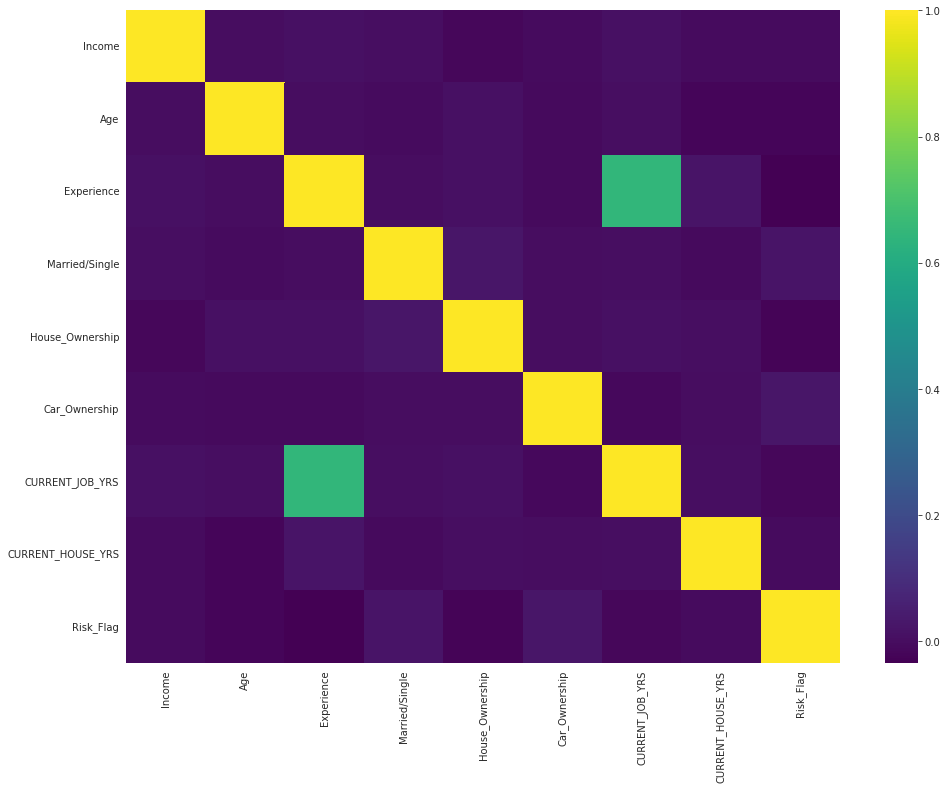

In [ ]:
#Final Data Outlook
df.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=df.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

## Develop machine learning models - logistic regression and  Decision Tree

In [ ]:
# Import the depedencies

import numpy as np
import pandas_datareader.data as web
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Logistic Regression

In [ ]:
x = df.drop('Risk_Flag',axis=1)#target variable
y= df['Risk_Flag']#value to be predicted

- Below we split our data into train and test sets

- Divide our data into features (X) and labels (y)

- Dataframe divided into X_train, X_test, y_train, and y_test. X_train and y_train sets are used for training and fitting the model.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((201600, 8), (50400, 8), (201600,), (50400,))

- Model fitting occuring below
- Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable that being said the dependent variable is a binary variable that contains data coded as 1 for Yes and 0 for No.

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

Now that we have trained the logistic regression model , now we can perfom prediction on a new data set i.e test data that was not used in training the model

In [ ]:
y_pred=model.predict(x_test)

**Notes:**

- Confusion Matrix : shows the number of TRUE positives,TRUE negatives and FALSE positives and FALSE negatives

- Accuracy score: Accuracy represents the number of correctly classified data instances over the total number of data instances hence we multiply the result by 100 to convert it to a percentage

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("\n")

print("Accuracy: \n", accuracy_score(y_test,y_pred)*100)
print("\n")

Confusion Matrix: 
 [[44259     0]
 [ 6141     0]]


Accuracy: 
 87.81547619047619




## Decision Tree model building

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from io import StringIO
from sklearn.model_selection import train_test_split

In [ ]:
model= DecisionTreeClassifier(criterion="entropy",random_state=25, max_depth=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("\n")

print("Accuracy: \n", accuracy_score(y_test,y_pred)*100)
print("\n")

Confusion Matrix: 
 [[44254     5]
 [ 6127    14]]


Accuracy: 
 87.83333333333333




##Deep Learning Model Building using tensors and keras

In [ ]:
#Importing dependencies 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## DEFINING ARCHITECTURE OF MODEL

- **Below we will be define the number of inputs, hidden and output neuron:**


- We picked relu as an activation function for hidden layers 
- We have used sigmoid activation function in the final layer.

1.  The model expects rows of data with 8 variables (the input_shape=(8,) argument)
2. The first hidden layer has 12 nodes and uses the relu activation function.
3. The second hidden layer has 8 nodes and uses the relu activation function.
4. The output layer has one node and uses the sigmoid activation function.

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### COMPILING THE MODEL (LOSS FUNCTION / OPTIMIZER): 

In this part we define our loss function and optimizer which is helpful in validating our data and backward propagation

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])# this function compiles the model and makes it completely
#ready to use

## TRAINING THE MODEL: 

- In this part we will train our model by passing our independent and dependent variable along with validation data and number of epochs which specifies the number of times our model is going through the training set.

- For each of the epoch, there will be a loss generated for the training and validation set and also we will get the accuracy for training and validation set since we have defined them during compilation phase and we are capturing

In [ ]:
hist=model.fit(x_train, y_train, 
              epochs=100, batch_size=32,
              validation_data=(x_test, y_test)
              )
#this method is used for model training on the dataset for the specified number of fixed epocs or iteration methods

Epoch 1/100
6300/6300 [==============================] - 13s 2ms/step - loss: 1111.1050 - accuracy: 0.7850 - val_loss: 288.2249 - val_accuracy: 0.8782
Epoch 2/100
6300/6300 [==============================] - 11s 2ms/step - loss: 891.9513 - accuracy: 0.7853 - val_loss: 3281.9373 - val_accuracy: 0.8782
Epoch 3/100
6300/6300 [==============================] - 12s 2ms/step - loss: 767.5924 - accuracy: 0.7866 - val_loss: 501.9387 - val_accuracy: 0.8782
Epoch 4/100
6300/6300 [==============================] - 13s 2ms/step - loss: 587.9721 - accuracy: 0.7856 - val_loss: 557.5276 - val_accuracy: 0.8782
Epoch 5/100
6300/6300 [==============================] - 13s 2ms/step - loss: 418.5070 - accuracy: 0.7844 - val_loss: 324.3058 - val_accuracy: 0.8782
Epoch 6/100
6300/6300 [==============================] - 13s 2ms/step - loss: 169.1540 - accuracy: 0.7718 - val_loss: 0.4949 - val_accuracy: 0.8782
Epoch 7/100
6300/6300 [==============================] - 13s 2ms/step - loss: 0.3883 - accuracy: 0.8

In [ ]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# we are getting the accuracy score.and this represents the number of correctly classified data instances
#over the total number of data instances

7875/7875 [==============================] - 11s 1ms/step - loss: 0.3729 - accuracy: 0.8770
Accuracy: 87.70


### VISUALIZING RESULTS (LOSS & ACCURACY): 

- Here, we will see the variation in loss function and accuracy observed over number of epochs.

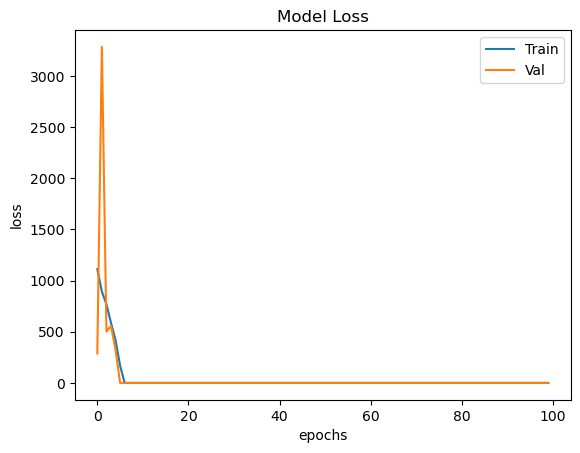

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Val'], loc='upper right')

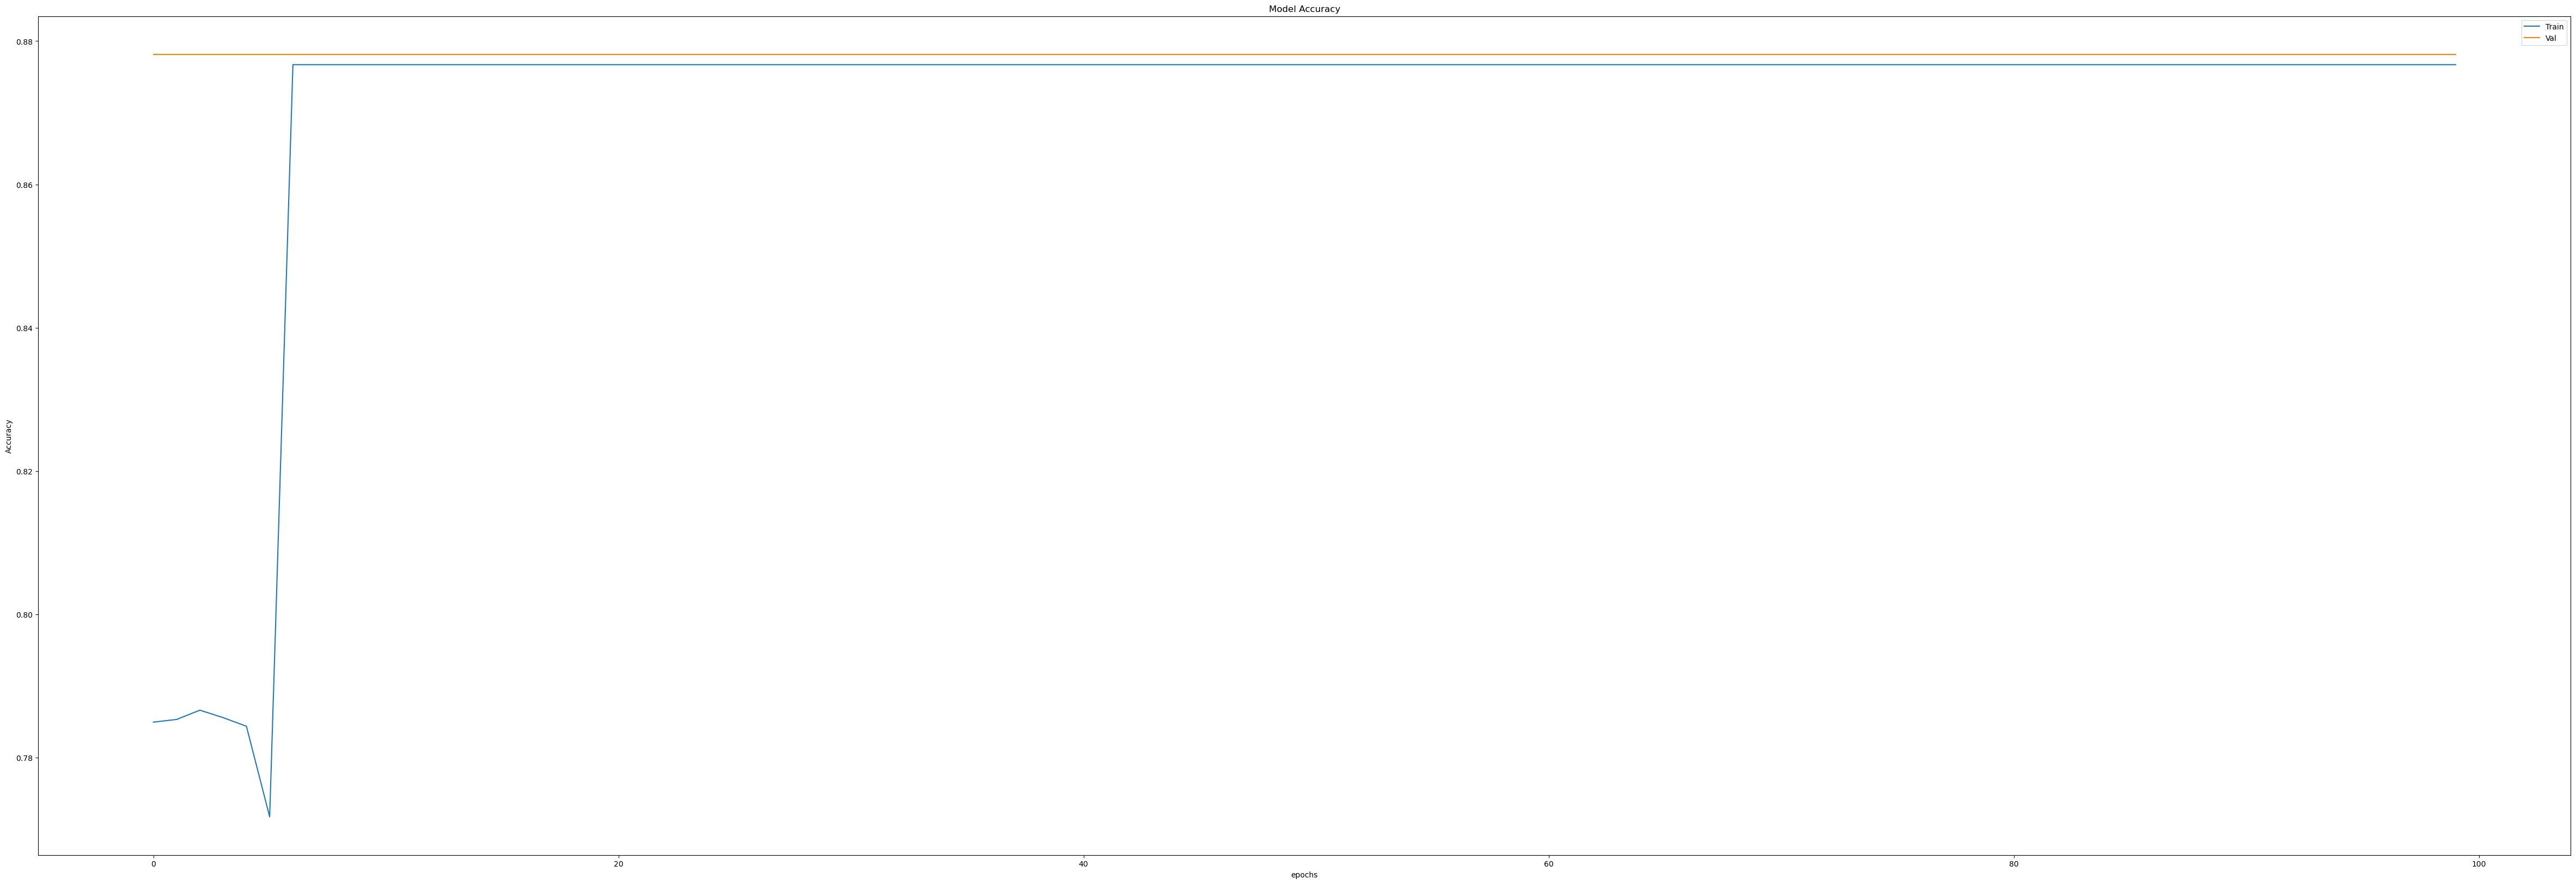

In [ ]:
plt.figure(figsize =(60,20))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Val'], loc='upper right')